In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('data.csv')

In [29]:
df.isnull().sum()

year                                                    0
CSUSHPISA                                               0
Inflation, consumer prices (annual %)                   1
GDP (constant 2015 US$)                                 1
Oil rents (% of GDP)                                    2
Tax revenue (% of GDP)                                  2
GDP per capita                                          1
Households and NPISHs Final consumption expenditure     2
Unemployment                                            1
dtype: int64

In [31]:
data=df.fillna(value=df['Inflation, consumer prices (annual %)'].mean())
data=df.fillna(value=df['GDP (constant 2015 US$)'].mean())
data=df.fillna(value=df['Oil rents (% of GDP)'].mean())
data=df.fillna(value=df['Tax revenue (% of GDP)'].mean())
data=df.fillna(value=df['GDP per capita'].mean())
data=df.fillna(value=df['Households and NPISHs Final consumption expenditure '].mean())
data=df.fillna(value=df['Unemployment'].mean())
data

,year,CSUSHPISA,"Inflation, consumer prices (annual %)",GDP (constant 2015 US$),Oil rents (% of GDP),Tax revenue (% of GDP),GDP per capita,Households and NPISHs Final consumption expenditure,Unemployment
0,2000,1257.221,3.376857,1.380000e+13,0.307551,12.970800,36329.956070,8.940000e+12,3.990000
1,2001,1358.154,2.826171,1.390000e+13,0.169433,11.857704,37133.623110,9.160000e+12,4.730000
2,2002,1467.342,1.586032,1.410000e+13,0.172817,9.868012,37997.759660,9.390000e+12,5.780000
3,2003,1604.772,2.270095,1.450000e+13,0.211789,9.390699,39490.274960,9.690000e+12,5.990000
4,2004,1805.281,2.677237,1.510000e+13,0.283171,9.537473,41724.631630,1.010000e+13,5.530000
5,2005,2060.841,3.392747,1.560000e+13,0.350823,10.681731,44123.407070,1.040000e+13,5.080000
6,2006,2201.369,3.225944,1.600000e+13,0.349464,11.310476,46302.000880,1.070000e+13,4.620000
7,2007,2159.026,2.852672,1.640000e+13,0.356897,11.289914,48050.223780,1.100000e+13,4.620000
8,2008,1968.686,3.839100,1.640000e+13,0.521499,10.276191,48570.045980,1.100000e+13,5.780000
9,2009,1782.535,-0.355546,1.600000e+13,0.259640,7.903518,47194.943350,1.080000e+13,9.250000


In [32]:
data.describe()

,year,CSUSHPISA,"Inflation, consumer prices (annual %)",GDP (constant 2015 US$),Oil rents (% of GDP),Tax revenue (% of GDP),GDP per capita,Households and NPISHs Final consumption expenditure,Unemployment
count,24.000000,24.000000,24.000000,2.400000e+01,24.000000,24.000000,24.000000,2.400000e+01,24.000000
mean,2011.500000,2051.680542,2.633264,1.636250e+13,0.746230,10.047053,49936.098241,1.042000e+13,5.854391
std,7.071068,535.761135,1.766202,4.059965e+12,1.578390,1.685612,14987.419514,3.502383e+12,1.786752
min,2000.000000,1257.221000,-0.355546,5.854391e+00,0.007525,5.854391,5.854391,5.854391e+00,3.611000
25%,2005.750000,1725.051500,1.613175,1.547500e+13,0.201351,9.538566,43523.713210,9.997500e+12,4.620000
50%,2011.500000,1972.539000,2.356339,1.650000e+13,0.299706,10.205731,49358.304815,1.100000e+13,5.440000
75%,2017.250000,2225.232750,3.263672,1.860000e+13,0.359809,11.230161,58376.997263,1.237500e+13,6.470000
max,2023.000000,3581.747000,8.002800,2.100000e+13,5.854391,12.970800,76398.591740,1.420000e+13,9.630000


In [33]:
# Define the target variable (CSUSHPISA) and independent variables
X = data[['Inflation, consumer prices (annual %)',
        'GDP (constant 2015 US$)',
        'Oil rents (% of GDP)',
        'Tax revenue (% of GDP)',
        'GDP per capita',
        'Households and NPISHs Final consumption expenditure ']]
y = data['CSUSHPISA']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)

In [37]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

In [38]:
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R-squared: {r_squared:.2f}')

MAE: 234.11
MSE: 71809.41
RMSE: 267.97
R-squared: 0.56


In [39]:
coefficients = model.coef_
intercept = model.intercept_

In [40]:
print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: -3047.5757412074995
Coefficients: [ 6.16738842e+01  2.84059184e-10  7.49507929e+02  1.73551635e+01
 -5.65691600e-02  2.33097519e-10]


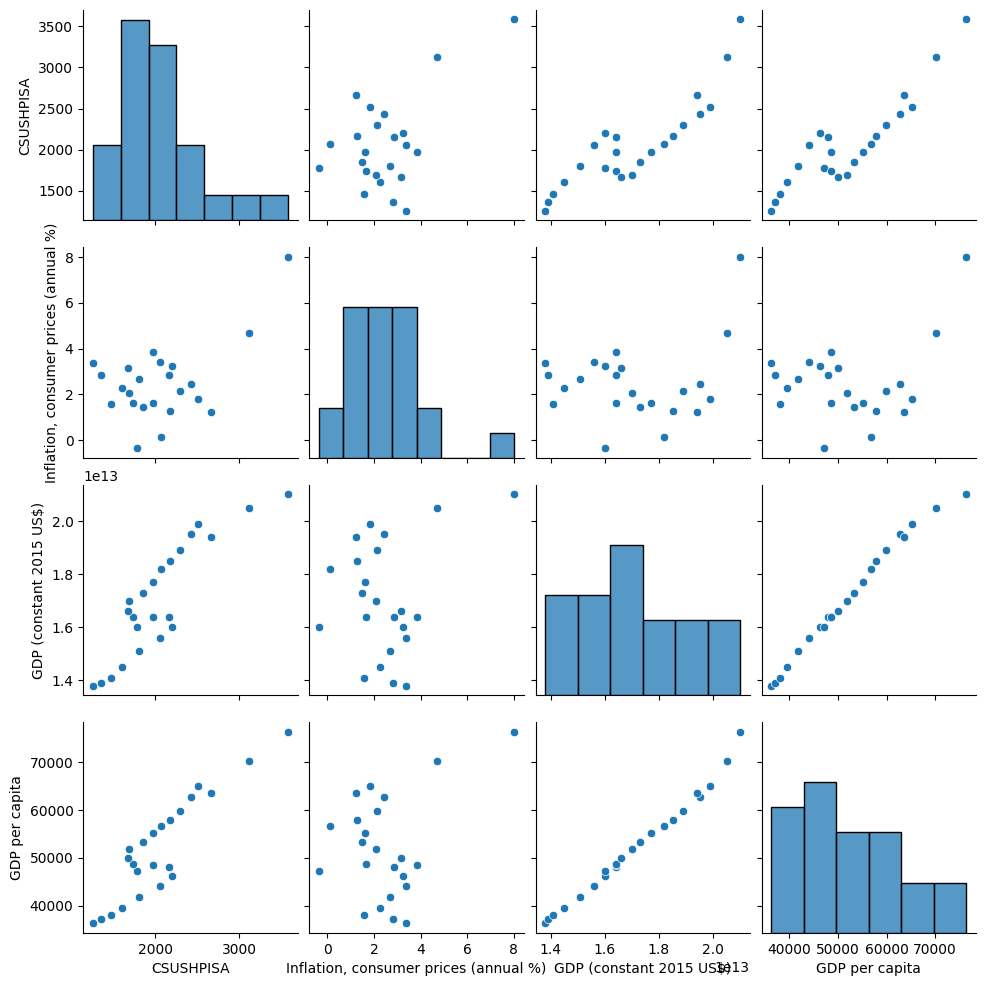

In [41]:
sns.pairplot(df[['CSUSHPISA', 'Inflation, consumer prices (annual %)', 'GDP (constant 2015 US$)', 'GDP per capita']])
plt.show()

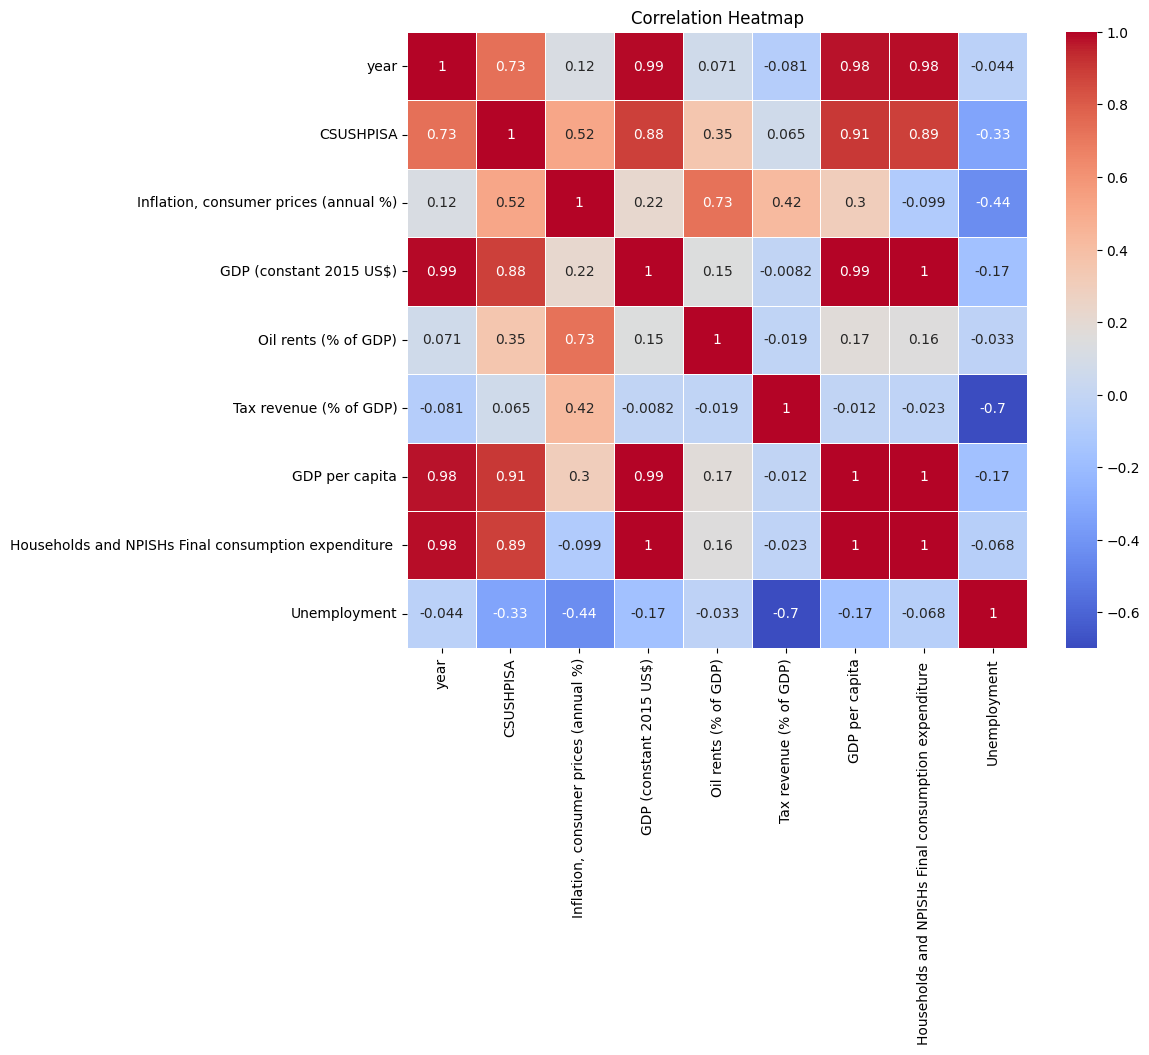

In [42]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

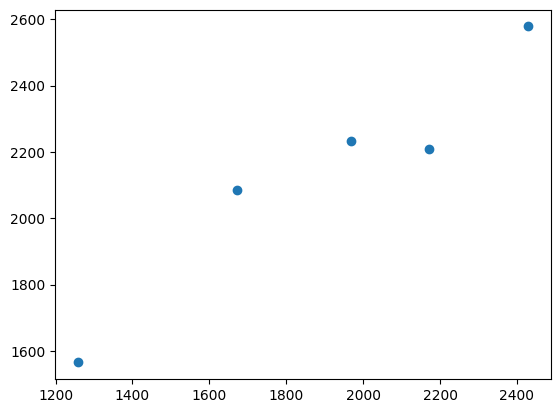

In [45]:
plt.scatter(y_test,y_pred)
plt.show()